In [91]:
%pip install librosa
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
import seaborn as sns
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from PIL import Image


In [101]:
albums = os.listdir('../Discography/Original/')
albums.remove('.DS_Store')
# albums.remove('chromagrams')
print(albums)
chromas = []
for album in albums:
# print(os.listdir('../Discography/'+album+'/'))
    for f in os.listdir('../Discography/Original/'+album+'/'):
        if f[-3:] == 'mp3' and os.path.isfile(os.path.join('../Discography/Original/'+album+'/', f)):
            # x, sr = librosa.load('../Discography/Exmilitary/08_Culture_Shock.mp3out003.mp3')
            x, sr = librosa.load(os.path.join('../Discography/Original/'+album+'/', f))
            hop_length = 512
            chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
            # chromas.append(chromagram)
            # plt.figure(figsize=(15, 5))
                # fig = plt.figure(figsize=(15, 5), frameon=False)
                # ax = plt.Axes(fig, [0., 0., 1., 1.])
                # ax.set_axis_off()
                # fig.add_axes(ax)
            img = Image.fromarray(chromagram, 'L')
            img.save('../Discography/pixelchromas/'+album+'/'+f[:-4]+'.png')

            # pd.DataFrame(chromagram).to_csv('../Discography/textchromas/'+album+'/'+f[:-4]+'.csv')
            # pd.DataFrame(chromagram).to_txt('../Discography/textchromas/'+album+'/'+f[:-4]+'.txt')

            # df[album+'/'+f[:-4]] = chromas
            # df = pd.DataFrame(chromas)
            # df.to_csv('../Discography/textchromas/'+album+'/'+f[:-4]+'.csv')
            # print(chromagram)
            # librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='binary')
            # plt.savefig('../Discography/chromagrams/'+album+'/'+f[:-4]+'.png')



['Exmilitary', 'ThePowersThatB', 'GovernmentPlates', 'TheMoneyStore', 'NoLoveDeepWeb', 'Steroids', 'YearOfTheSnitch', 'BottomlessPit']


/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_46847/353611584.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(os.path.join('../Discography/Original/'+album+'/', f))
/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=835
  warnings.warn(


In [104]:
x, sr = librosa.load('../01_More_Than_The_Fairy_(feat_Les_Claypool).mp3')
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
img = Image.fromarray(chromagram, 'L')
img.save('MoreThanTheFairy.png')

In [61]:
import os
import numpy as np
import shutil

# # Creating Train / Val / Test folders (One time use)
root_dir = '../Discography/textchromas'
posCls = '/DPN+'
negCls = '/DPN-'

em = '/Exmilitary'
dw = '/NoLoveDeepWeb'
ms = '/TheMoneyStore'
gp = '/GovernmentPlates'
pb = '/ThePowersThatB'
bp = '/BottomlessPit'
ys = '/YearOfTheSnitch'
st = '/Steroids'

# os.makedirs(root_dir +'/train' + posCls)
# os.makedirs(root_dir +'/train' + negCls)

os.makedirs(root_dir +'/train' + em)
os.makedirs(root_dir +'/train' + dw)
os.makedirs(root_dir +'/train' + ms)
os.makedirs(root_dir +'/train' + gp)
os.makedirs(root_dir +'/train' + pb)
os.makedirs(root_dir +'/train' + bp)
os.makedirs(root_dir +'/train' + ys)
os.makedirs(root_dir +'/train' + st)

# os.makedirs(root_dir +'/val' + posCls)
# os.makedirs(root_dir +'/val' + negCls)

os.makedirs(root_dir +'/val' + em)
os.makedirs(root_dir +'/val' + dw)
os.makedirs(root_dir +'/val' + ms)
os.makedirs(root_dir +'/val' + gp)
os.makedirs(root_dir +'/val' + pb)
os.makedirs(root_dir +'/val' + bp)
os.makedirs(root_dir +'/val' + ys)
os.makedirs(root_dir +'/val' + st)

# os.makedirs(root_dir +'/test' + posCls)
# os.makedirs(root_dir +'/test' + negCls)

os.makedirs(root_dir +'/test' + em)
os.makedirs(root_dir +'/test' + dw)
os.makedirs(root_dir +'/test' + ms)
os.makedirs(root_dir +'/test' + gp)
os.makedirs(root_dir +'/test' + pb)
os.makedirs(root_dir +'/test' + bp)
os.makedirs(root_dir +'/test' + ys)
os.makedirs(root_dir +'/test' + st)

In [69]:
# Creating partitions of the data after shuffeling
currentCls = st
src = root_dir+currentCls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, root_dir+"/train"+currentCls)

for name in val_FileNames:
    shutil.copy(name, root_dir+"/val"+currentCls)

for name in test_FileNames:
    shutil.copy(name, root_dir+"/test"+currentCls)

Total images:  50
Training:  35
Validation:  7
Testing:  8


<class 'numpy.ndarray'>


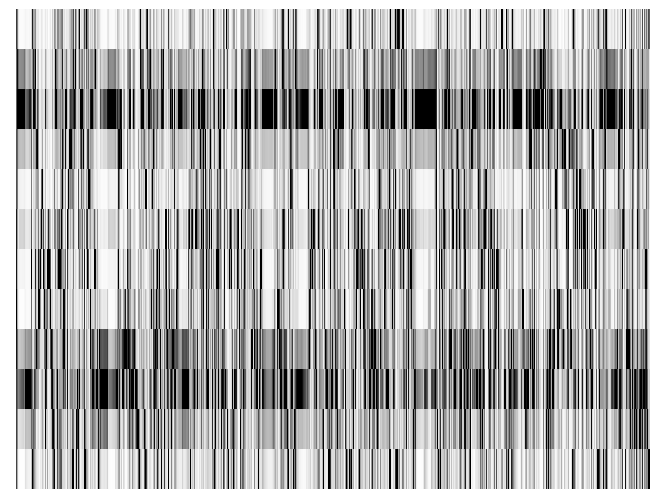

In [90]:
x, sr = librosa.load('../Discography/Original/Exmilitary/01_Beware_(Beast_Work).mp3out000.mp3')
hop_length = 512
# librosa.feature.chroma_stft
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
print(type(chromagram))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
# ax = sns.heatmap(chromagram)
# plt.show()
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='binary')
# librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length)
# librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
# plt.savefig(f+'.png')

/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_46847/3483315325.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(f)
/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NoBackendError: 

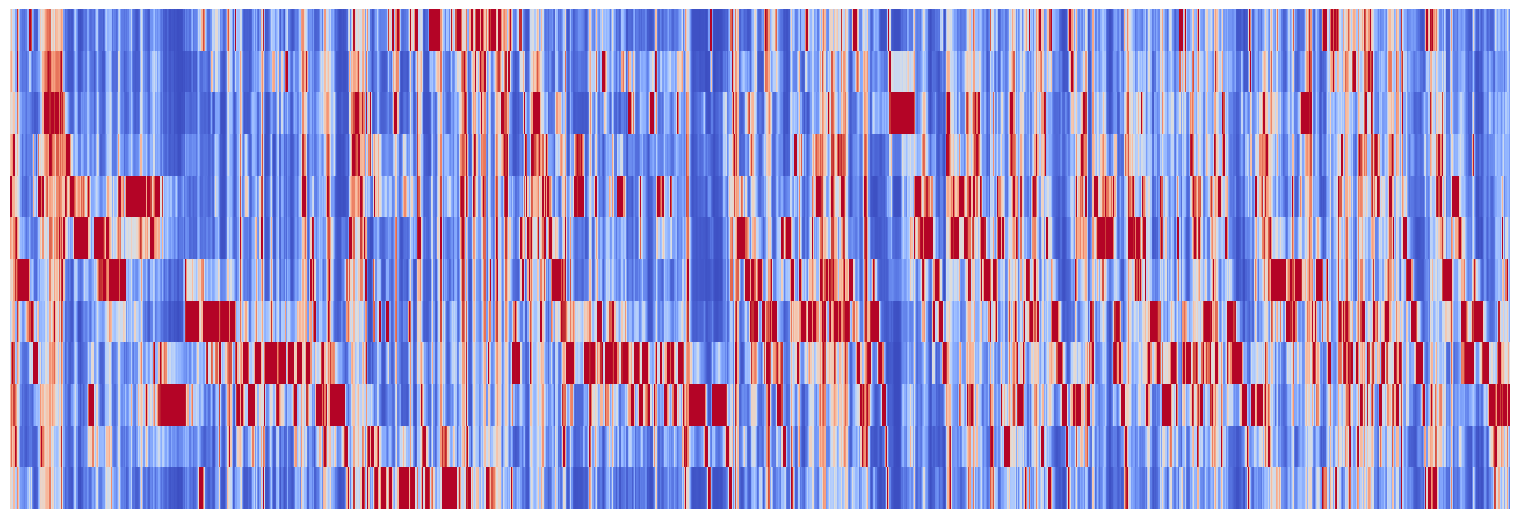

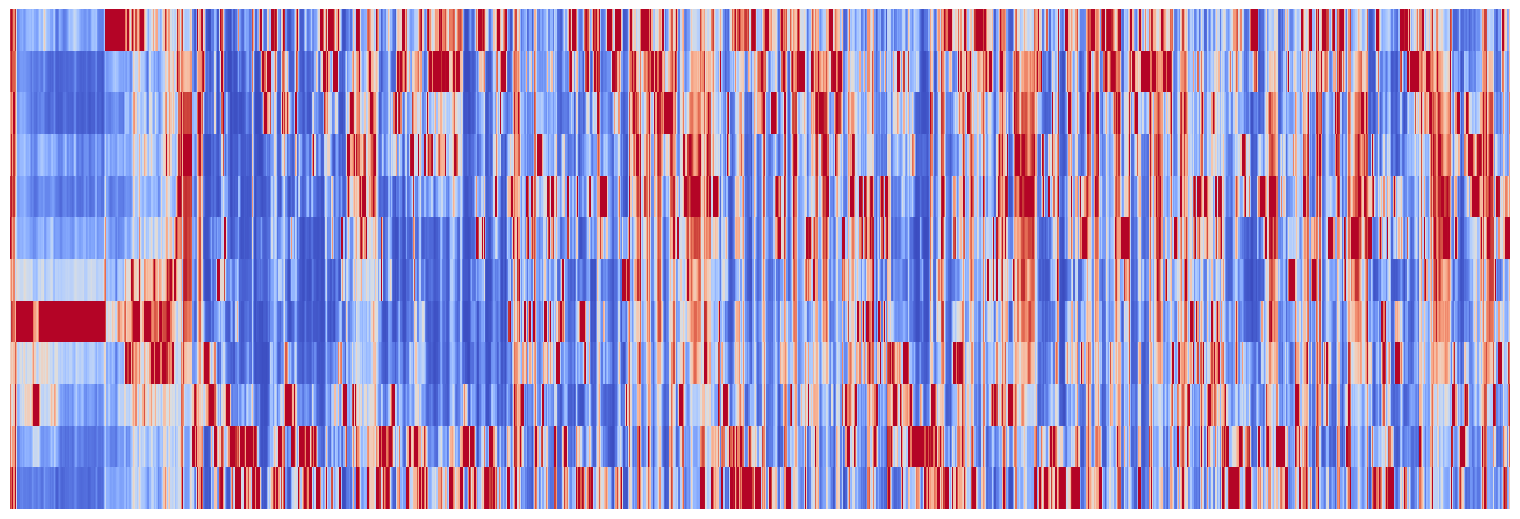

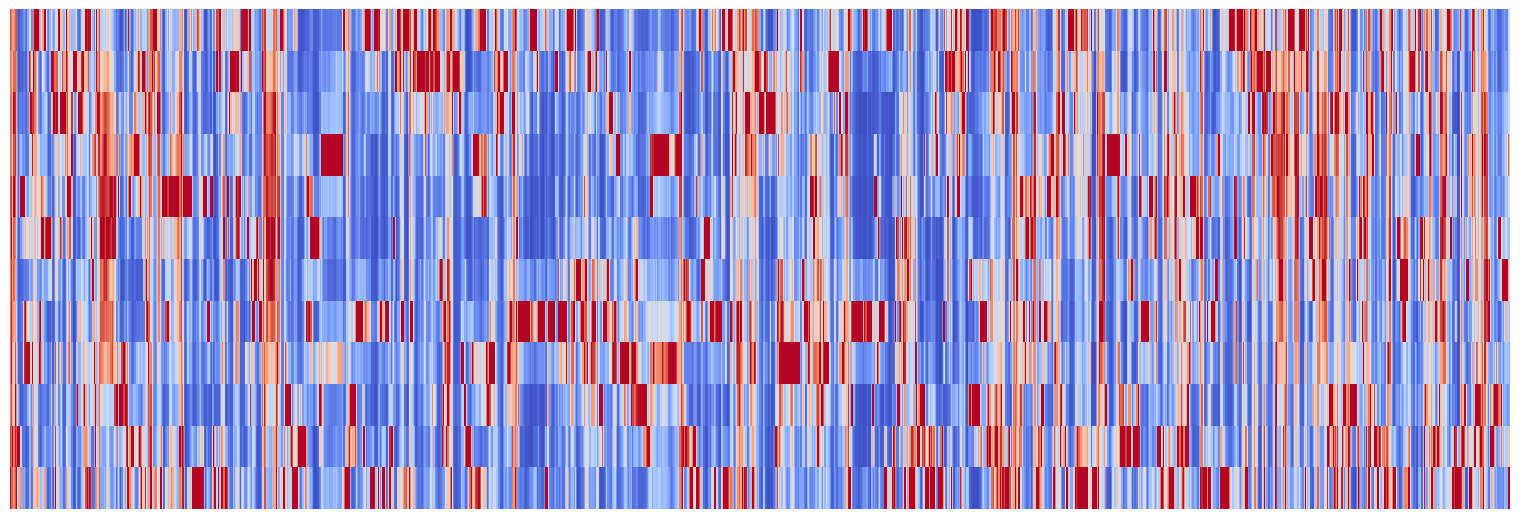

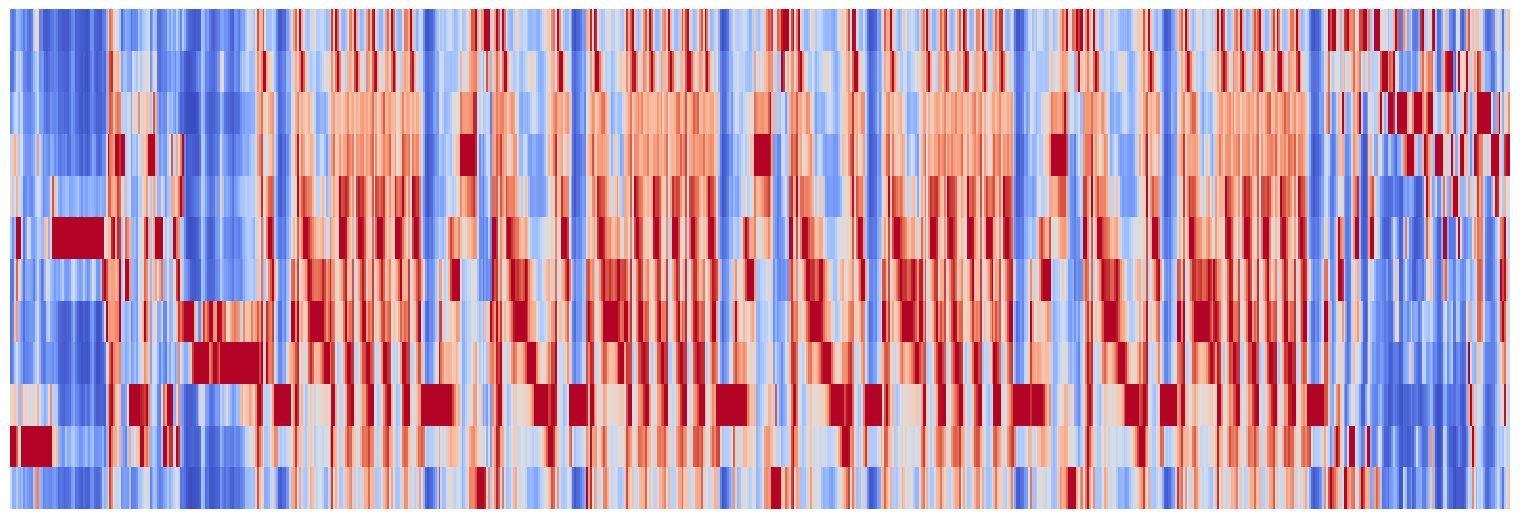

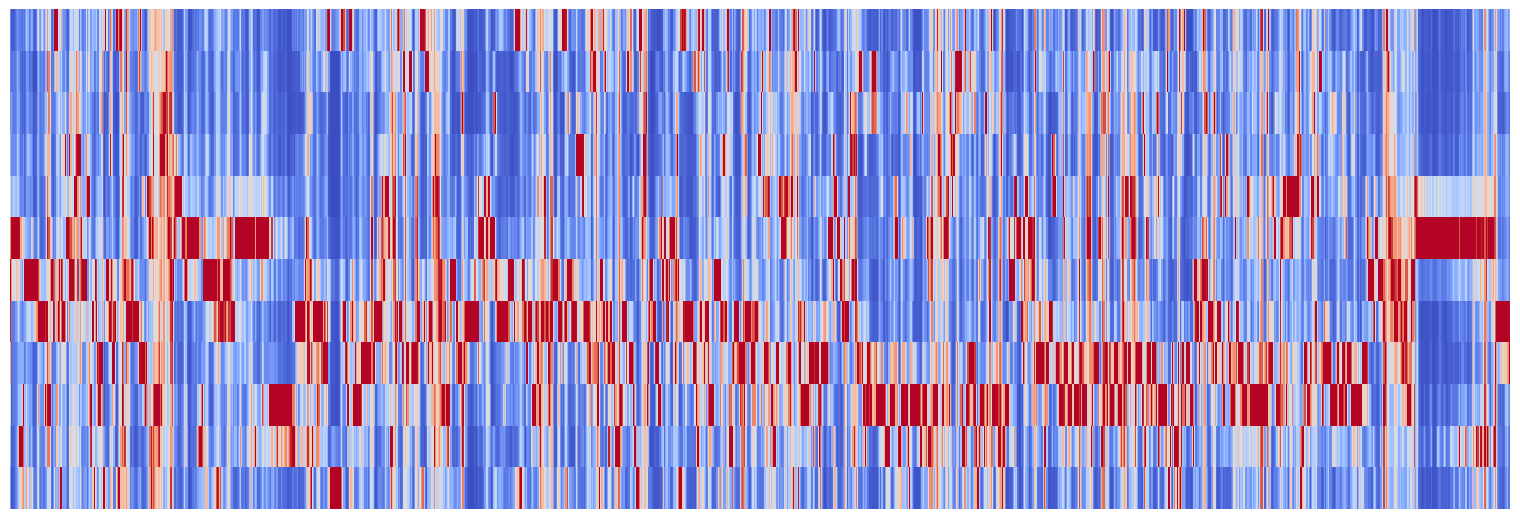

In [11]:
# x, sr = librosa.load('../ThePowersThatBMP3/09_On_GP.mp3')
import os
# assign directory
directory = '../Discography/Exmilitary/' 

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        x, sr = librosa.load(f)
        hop_length = 512
        # librosa.feature.chroma_stft
        chromagram = librosa.feature.chroma_stft(y=x, sr=sr)
        fig = plt.figure(figsize=(15, 5), frameon=False)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
        plt.savefig(f+'.png')

/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_46847/3405737786.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(f)
/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NoBackendError: 

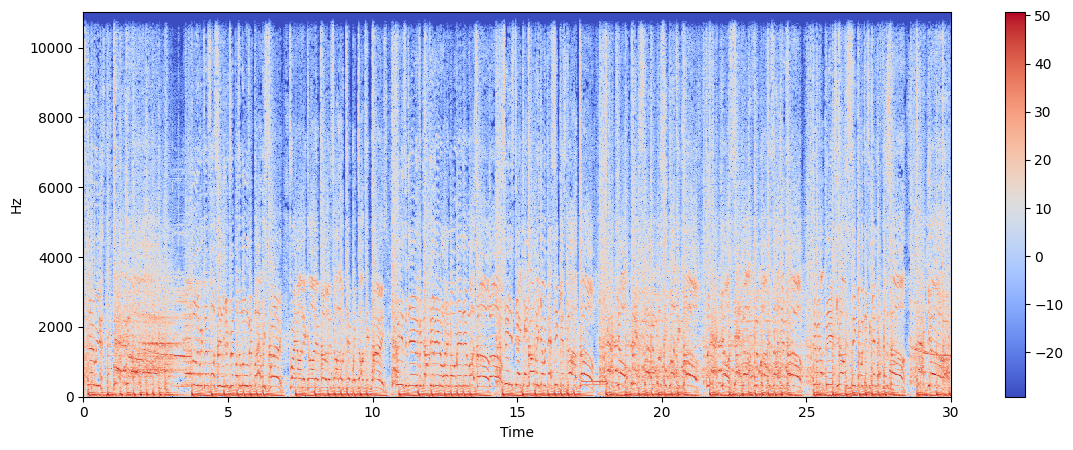

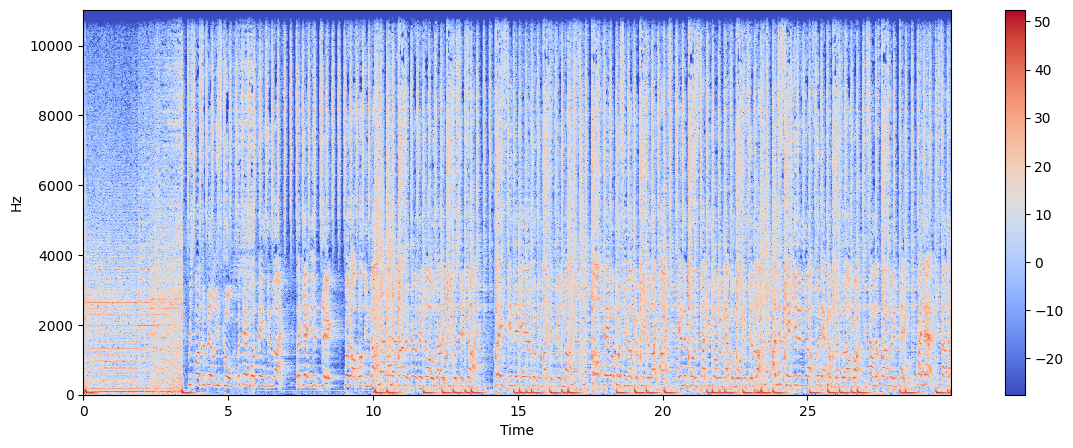

In [18]:
directory = '../Discography/Exmilitary/'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        x, sr = librosa.load(f)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
        plt.colorbar()
        # print(X)
        # chromagram = librosa.feature.chroma_stft(y=X, sr=sr)
        # fig = plt.figure(figsize=(14, 5), frameon=False)
        # ax = plt.Axes(fig, [0., 0., 1., 1.])
        # ax.set_axis_off()
        # fig.add_axes(ax)
        # librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
        # plt.savefig(f+'.png')


In [3]:
import tensorflow as tf
from tensorflow import keras

: 

: 

In [ ]:
df = pd.read_csv('../Data/features_3_sec.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df = df.drop(labels='filename', axis=1)

In [ ]:
audio_recording = "../Data/genres_original/country/country.00050.wav"
data, sr = librosa.load(audio_recording)
print(type(data), type(sr))

In [ ]:
librosa.load(audio_recording, sr=45600)

In [ ]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [ ]:
y = convertor.fit_transform(class_list)
print(df.iloc[:,:-1])

In [ ]:
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:,:-1], dytpe = float))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(len(y_train))
print(len(y_test))